In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [2]:
path = Path.cwd()/'logs'
path

PosixPath('/Users/davoodwadi/supp/ImageNet/non-adaptive/logs')

In [3]:
files = [f for f in path.iterdir()]
files

[PosixPath('/Users/davoodwadi/supp/ImageNet/non-adaptive/logs/activesgd_5e-05_0_256_42.json'),
 PosixPath('/Users/davoodwadi/supp/ImageNet/non-adaptive/logs/activesgd_1e-05_0_256_42.json'),
 PosixPath('/Users/davoodwadi/supp/ImageNet/non-adaptive/logs/activesgd_0.01_0_256_42.json'),
 PosixPath('/Users/davoodwadi/supp/ImageNet/non-adaptive/logs/sgd_1.0_0_256_42.json'),
 PosixPath('/Users/davoodwadi/supp/ImageNet/non-adaptive/logs/activesgd_0.05_0_256_42.json'),
 PosixPath('/Users/davoodwadi/supp/ImageNet/non-adaptive/logs/sgd_0.005_0_256_42.json'),
 PosixPath('/Users/davoodwadi/supp/ImageNet/non-adaptive/logs/sgd_0.001_0_256_42.json'),
 PosixPath('/Users/davoodwadi/supp/ImageNet/non-adaptive/logs/activesgd_1.0_0_256_42.json'),
 PosixPath('/Users/davoodwadi/supp/ImageNet/non-adaptive/logs/activesgd_0.0001_0_256_42.json'),
 PosixPath('/Users/davoodwadi/supp/ImageNet/non-adaptive/logs/sgd_5e-05_0_256_42.json'),
 PosixPath('/Users/davoodwadi/supp/ImageNet/non-adaptive/logs/activesgd_0.0005_

In [4]:
f = files[0]
fname = f.stem
meta = fname.split('_')
meta

['activesgd', '5e-05', '0', '256', '42']

In [5]:
def extract_meta(f):
    fname = f.stem
    meta = fname.split('_')
    optim = meta[0]
    lr = float(meta[1])
    wd = float(meta[2])
#     scheduler = ((meta[3]).split('.'))[1]
    bs = int(meta[3])
    seed = int(meta[4])
    try:
        with open(f, 'r') as file:
            data = json.load(file)
    except:
        print(f)
    return optim, lr, wd, bs, seed, data

In [6]:
dictt = {
    
    'optim':[],
    'lr':[],
    'wd':[],
#     'scheduler':[],
    'bs':[],
    'seed':[],
#     'best_ppl':[],
    'best_acc':[],
    'max_epochs':[],
    'train_losses':[],
    'accs1':[],
    'accs5':[],
    'epoch_time':[],
    'epochs':[],
}
for f in files:
    optim, lr, wd, bs, seed, data = extract_meta(f)
    dictt['optim'].append(optim)
    dictt['lr'].append(lr)
    dictt['wd'].append(wd)
#     dictt['scheduler'].append(scheduler)
    dictt['bs'].append(bs)
    dictt['seed'].append(seed)
    dictt['accs1'].append(data.get('accs1'))
    dictt['accs5'].append(data.get('accs5'))
    dictt['best_acc'].append(max(data.get('accs1')))
    dictt['max_epochs'].append(max(data.get('epochs')))
#     dictt['best_test'].append(max(data.get('test_ppls')))
#     dictt['best_ppl'].append(data.get('best_ppl'))
#     dictt['best_test'].append(data.get('best_test'))
    dictt['train_losses'].append(data.get('train_losses'))

    dictt['epoch_time'].append(data.get('epoch_time'))
    dictt['epochs'].append(data.get('epochs'))
dictt

{'optim': ['activesgd',
  'activesgd',
  'activesgd',
  'sgd',
  'activesgd',
  'sgd',
  'sgd',
  'activesgd',
  'activesgd',
  'sgd',
  'activesgd',
  'activesgd',
  'sgd',
  'activesgd',
  'sgd',
  'sgd',
  'sgd',
  'sgd',
  'sgd',
  'sgd',
  'activesgd',
  'activesgd'],
 'lr': [5e-05,
  1e-05,
  0.01,
  1.0,
  0.05,
  0.005,
  0.001,
  1.0,
  0.0001,
  5e-05,
  0.0005,
  0.005,
  0.5,
  0.001,
  0.1,
  1e-05,
  0.0005,
  0.0001,
  0.05,
  0.01,
  0.5,
  0.1],
 'wd': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'bs': [256,
  256,
  256,
  256,
  256,
  256,
  256,
  256,
  256,
  256,
  256,
  256,
  256,
  256,
  256,
  256,
  256,
  256,
  256,
  256,
  256,
  256],
 'seed': [42,
  42,
  42,
  42,
  42,
  42,
  42,
  42,
  42,
  42,
  42,
  42,
  42,
  42,
  42,
  42,
  42,
  42,
  42,
  42,
  42,
  42],
 'best_acc': [31.323999404907227,
  10.149999618530273,
  66.699996948

In [7]:
df = pd.DataFrame(dictt)
# df['wdlr'] = df['lr']*df['wd']
df

optim       lr   wd   bs  seed   best_acc  max_epochs  \
0   activesgd  0.00005  0.0  256    42  31.323999          99   
1   activesgd  0.00001  0.0  256    42  10.150000          99   
2   activesgd  0.01000  0.0  256    42  66.699997          99   
3         sgd  1.00000  0.0  256    42  66.778000          99   
4   activesgd  0.05000  0.0  256    42  67.596001          99   
5         sgd  0.00500  0.0  256    42  65.801994          99   
6         sgd  0.00100  0.0  256    42  58.764000          99   
7   activesgd  1.00000  0.0  256    42  67.021996          99   
8   activesgd  0.00010  0.0  256    42  41.852001          99   
9         sgd  0.00005  0.0  256    42  13.251999          99   
10  activesgd  0.00050  0.0  256    42  57.910000          99   
11  activesgd  0.00500  0.0  256    42  65.755997          99   
12        sgd  0.50000  0.0  256    42  67.393997          99   
13  activesgd  0.00100  0.0  256    42  61.552002          99   
14        sgd  0.10000  0.0  256    42  67.743996          99   
15        sgd  0.00001  0.0  256    42   3.128000          99   
16        sgd  0.00050  0.0  256    42  51.643997          99   
17        sgd  0.00010  0.0  256    42  23.544001          99   
18        sgd  0.05000  0.0  256    42  67.739998          99   
19        sgd  0.01000  0.0  256    42  66.748001          99   
20  activesgd  0.50000  0.0  256    42  67.372002          99   
21  activesgd  0.10000  0.0  256    42  67.820000          99   

                                         train_losses  \
0   [6.9490838050842285, 6.862488746643066, 6.8077...   
1   [7.008026123046875, 6.9689202308654785, 6.9414...   
2   [5.370937347412109, 4.16212797164917, 3.615478...   
3   [5.506335258483887, 3.7905187606811523, 3.1579...   
4   [4.948087215423584, 3.5739760398864746, 3.0695...   
5   [5.697559833526611, 4.636541843414307, 4.08221...   
6   [6.410748481750488, 5.714308738708496, 5.35186...   
7   [5.506556510925293, 3.757265090942383, 3.13604...   
8   [6.905476093292236, 6.779172420501709, 6.64882...   
9   [6.949322700500488, 6.863092422485352, 6.80831...   
10  [6.6666998863220215, 6.104923248291016, 5.7913...   
11  [5.699788570404053, 4.63297176361084, 4.070248...   
12  [4.981052875518799, 3.3781931400299072, 2.8849...   
13  [6.423874855041504, 5.726641654968262, 5.34470...   
14  [4.953372955322266, 3.4919228553771973, 2.9701...   
15  [7.0081658363342285, 6.968955993652344, 6.9426...   
16  [6.661400318145752, 6.096831321716309, 5.79028...   
17  [6.906189918518066, 6.781883716583252, 6.65859...   
18  [4.952556133270264, 3.5838823318481445, 3.0702...   
19  [5.352198123931885, 4.156324863433838, 3.61566...   
20  [4.985512733459473, 3.366487741470337, 2.87934...   
21  [4.9135661125183105, 3.467482328414917, 2.9623...   

                                                accs1  \
0   [0.2880000174045563, 0.5459999442100525, 0.726...   
1   [0.07999999821186066, 0.16599999368190765, 0.2...   
2   [14.927999496459961, 24.697999954223633, 30.07...   
3   [17.38800048828125, 32.805999755859375, 39.618...   
4   [23.20800018310547, 34.03199768066406, 40.9919...   
5   [11.097999572753906, 18.738000869750977, 21.84...   
6   [3.3259999752044678, 6.418000221252441, 9.1280...   
7   [16.74799919128418, 32.652000427246094, 39.987...   
8   [0.5299999713897705, 0.9800000190734863, 1.335...   
9   [0.2840000092983246, 0.5260000228881836, 0.777...   
10  [1.7439998388290405, 3.5280001163482666, 5.495...   
11  [9.875999450683594, 19.06999969482422, 24.4039...   
12  [25.992000579833984, 39.37799835205078, 43.618...   
13  [3.1419999599456787, 6.328000068664551, 9.4559...   
14  [24.079999923706055, 35.63999938964844, 43.851...   
15  [0.07999999821186066, 0.1639999896287918, 0.24...   
16  [1.7260000705718994, 3.697999954223633, 4.9519...   
17  [0.5320000052452087, 0.9259999990463257, 1.200...   
18  [21.04399871826172, 34.0260009765625, 40.74199...   
19  [14.754000663757324, 25.895998001098633, 30.89...   
20 

In [8]:
lrs = df.lr.unique()
lrs.sort()
lrs

array([1.e-05, 5.e-05, 1.e-04, 5.e-04, 1.e-03, 5.e-03, 1.e-02, 5.e-02,
       1.e-01, 5.e-01, 1.e+00])

## SGD

In [10]:
sgd = df[df['optim']=='sgd']
activesgd = df[df['optim']=='activesgd']
activesgd.head()

optim       lr   wd   bs  seed   best_acc  max_epochs  \
0  activesgd  0.00005  0.0  256    42  31.323999          99   
1  activesgd  0.00001  0.0  256    42  10.150000          99   
2  activesgd  0.01000  0.0  256    42  66.699997          99   
4  activesgd  0.05000  0.0  256    42  67.596001          99   
7  activesgd  1.00000  0.0  256    42  67.021996          99   

                                        train_losses  \
0  [6.9490838050842285, 6.862488746643066, 6.8077...   
1  [7.008026123046875, 6.9689202308654785, 6.9414...   
2  [5.370937347412109, 4.16212797164917, 3.615478...   
4  [4.948087215423584, 3.5739760398864746, 3.0695...   
7  [5.506556510925293, 3.757265090942383, 3.13604...   

                                               accs1  \
0  [0.2880000174045563, 0.5459999442100525, 0.726...   
1  [0.07999999821186066, 0.16599999368190765, 0.2...   
2  [14.927999496459961, 24.697999954223633, 30.07...   
4  [23.20800018310547, 34.03199768066406, 40.9919...   
7  [16.74799919128418, 32.652000427246094, 39.987...   

                                               accs5   epoch_time  \
0  [1.1979999542236328, 2.001999855041504, 2.6840...  2379.577645   
1  [0.550000011920929, 0.699999988079071, 0.87000...  2388.350078   
2  [34.194000244140625, 48.827999114990234, 55.23...  2034.706290   
4  [46.97199630737305, 60.17000198364258, 66.8919...  2380.693789   
7  [36.50400161743164, 58.444000244140625, 65.695...  2399.069576   

                                              epochs  
0  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
1  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
2  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
4  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
7  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...

In [11]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
from pathlib import Path

params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
         }
plt.rcParams.update(params)


import re
import json
from matplotlib import cm

from collections import defaultdict

from matplotlib.ticker import FormatStrFormatter

plt.rcParams.get('figure.figsize')

[6.0, 4.0]

In [12]:
cmap = cm.tab20

lr2c=dict()
for lr in lrs:
    index = np.where(lrs==lr)[0].item()
    if index>17:
        index-=18
    lr2c[lr]=cmap(index*2)
lr2c

{1e-05: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 5e-05: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 0.0001: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 0.0005: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 0.001: (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 0.005: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 0.01: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 0.05: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 0.1: (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 0.5: (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
 1.0: (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0)}

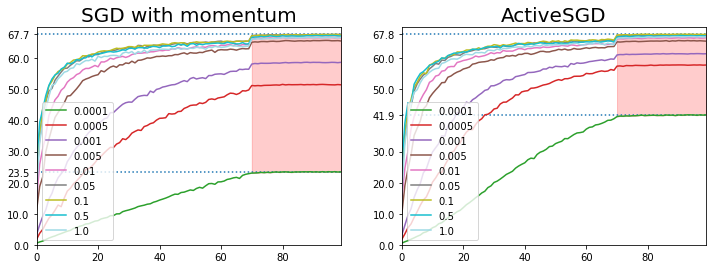

In [13]:
optim1 = 'sgd'
optim2 = 'activesgd'

fig, axes = plt.subplots(1,2, figsize=(12,4), sharex=True)
thresh = 1e-4

test_acc11=[]
test_acc21=[]
test_acc15=[]
test_acc25=[]
train_loss1=[]
train_loss2=[]

maxi11=maxi21=0
maxi15=maxi25=0
mini1=mini2=float('inf')
for lr in lrs:
    optimizer = optim1
    if lr<thresh: continue
    
#     if lr==0.5: continue
    
    data = df[(df['optim']==optimizer) & (df['lr']==lr)]
    test_accs11 = np.array(data.accs1.iloc[0])
    test_accs15 = np.array(data.accs5.iloc[0])
    train_losses1 = np.array(data.train_losses.iloc[0])
    if maxi11<test_accs11.max(): maxi11 = test_accs11.max()
    if maxi15<test_accs15.max(): maxi15 = test_accs15.max()
    if mini1>train_losses1.min(): mini1 = train_losses1.min()
    
    if lr==thresh:
        lowMax1 = test_accs11.max()
    
    test_acc11.append(test_accs11)
    test_acc15.append(test_accs15)
    train_loss1.append(train_losses1)
    
    axes[0].plot(test_accs11, label=f"{lr}", c=lr2c[lr])

for lr in lrs:
    optimizer = optim2
    if lr<thresh: continue
    data = df[(df['optim']==optimizer) & (df['lr']==lr)]
    test_accs21 = np.array(data.accs1.iloc[0])
    test_accs25 = np.array(data.accs5.iloc[0])
    train_losses2 = np.array(data.train_losses.iloc[0])
    if maxi21<test_accs21.max(): maxi21 = test_accs21.max()
    if maxi25<test_accs25.max(): maxi25 = test_accs25.max()
    if mini2>train_losses2.min(): mini2 = train_losses2.min()
    
    if lr==thresh:
        lowMax2 = test_accs21.max()
    
    test_acc21.append(test_accs21)
    test_acc25.append(test_accs25)
    train_loss2.append(train_losses2)
    
    axes[1].plot(test_accs21, label=f"{lr}", c=lr2c[lr])
    
test_acc1 = np.array(test_acc11)
test_acc2 = np.array(test_acc21)
max1 = test_acc1.max(0)
max2 = test_acc2.max(0)
min1 = test_acc1.min(0)
min2 = test_acc2.min(0)

axes[0].fill_between(range(70,100), min1[70:], max1[70:], color='red', alpha=.2)
axes[1].fill_between(range(70,100), min2[70:], max2[70:], color='red', alpha=0.2)

axes[0].hlines(maxi11, 0, 99, linestyle='dotted')
axes[0].hlines(lowMax1, 0, 99, linestyle='dotted')
yticks0 = axes[0].get_yticks()
yt0 = list(yticks0)
yt0.append(maxi11)
yt0.append(lowMax1)
# yt0.remove(50)
yt0.remove(70)
axes[0].set_yticks(yt0)

axes[1].hlines(maxi21, 0, 99, linestyle='dotted')
axes[1].hlines(lowMax2, 0, 99, linestyle='dotted')
# axes[1].hlines(min2, 0, 199)
yticks1 = axes[1].get_yticks()
yt1 = list(yticks1)
yt1.append(maxi21)
yt1.append(lowMax2)
yt1.remove(40)
yt1.remove(70)
axes[1].set_yticks(yt1)

axes[0].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

axes[0].set_ylim(0, 70)
axes[1].set_ylim(0, 70)

axes[0].set_xlim(0,99)
axes[1].set_xlim(0,99)

axes[0].set_title('SGD with momentum')
axes[1].set_title('ActiveSGD')
axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')

In [14]:
fig.savefig('./imagenetsgdtop1.png', dpi=300, bbox_inches='tight')

In [15]:
optim1 = 'sgd'
optim2 = 'activesgd'

fig, axes = plt.subplots(1,2, figsize=(12,4), sharex=True)
thresh = 1e-4

test_acc11=[]
test_acc21=[]
test_acc15=[]
test_acc25=[]
train_loss1=[]
train_loss2=[]

maxi11=maxi21=0
maxi15=maxi25=0
mini1=mini2=float('inf')
for lr in lrs:
    optimizer = optim1
    if lr<thresh: continue
    
#     if lr==0.5: continue
    
    data = df[(df['optim']==optimizer) & (df['lr']==lr)]
    test_accs11 = np.array(data.accs1.iloc[0])
    test_accs15 = np.array(data.accs5.iloc[0])
    train_losses1 = np.array(data.train_losses.iloc[0])
    if maxi11<test_accs11.max(): maxi11 = test_accs11.max()
    if maxi15<test_accs15.max(): maxi15 = test_accs15.max()
    if mini1>train_losses1.min(): mini1 = train_losses1.min()
    
    if lr==thresh:
        lowMax1 = test_accs15.max()
    
    test_acc11.append(test_accs11)
    test_acc15.append(test_accs15)
    train_loss1.append(train_losses1)
    
    axes[0].plot(test_accs15, label=f"{lr}", c=lr2c[lr])

for lr in lrs:
    optimizer = optim2
    if lr<thresh: continue
    data = df[(df['optim']==optimizer) & (df['lr']==lr)]
    test_accs21 = np.array(data.accs1.iloc[0])
    test_accs25 = np.array(data.accs5.iloc[0])
    train_losses2 = np.array(data.train_losses.iloc[0])
    if maxi21<test_accs21.max(): maxi21 = test_accs21.max()
    if maxi25<test_accs25.max(): maxi25 = test_accs25.max()
    if mini2>train_losses2.min(): mini2 = train_losses2.min()
    
    if lr==thresh:
        lowMax2 = test_accs25.max()
    
    test_acc21.append(test_accs21)
    test_acc25.append(test_accs25)
    train_loss2.append(train_losses2)
    
    axes[1].plot(test_accs25, label=f"{lr}", c=lr2c[lr])
    
test_acc1 = np.array(test_acc15)
test_acc2 = np.array(test_acc25)
max1 = test_acc1.max(0)
max2 = test_acc2.max(0)
min1 = test_acc1.min(0)
min2 = test_acc2.min(0)

axes[0].fill_between(range(70,100), min1[70:], max1[70:], color='red', alpha=.2)
axes[1].fill_between(range(70,100), min2[70:], max2[70:], color='red', alpha=0.2)

axes[0].hlines(maxi15, 0, 99, linestyle='dotted')
axes[0].hlines(lowMax1, 0, 99, linestyle='dotted')
yticks0 = axes[0].get_yticks()
yt0 = list(yticks0)
yt0.append(maxi15)
yt0.append(lowMax1)
# yt0.remove(50)
# yt0.remove(90)
axes[0].set_yticks(yt0)

axes[1].hlines(maxi25, 0, 99, linestyle='dotted')
axes[1].hlines(lowMax2, 0, 99, linestyle='dotted')
# axes[1].hlines(min2, 0, 199)
yticks1 = axes[1].get_yticks()
yt1 = list(yticks1)
yt1.append(maxi25)
yt1.append(lowMax2)
yt1.remove(80)
# yt1.remove(90)
axes[1].set_yticks(yt1)

axes[0].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# axes[0].set_ylim(0, 70)
# axes[1].set_ylim(0, 70)

axes[0].set_xlim(0,99)
axes[1].set_xlim(0,99)

axes[0].set_title('SGD with momentum')
axes[1].set_title('ActiveSGD')
axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')

In [16]:
fig.savefig('./imagenetsgdtop5.png', dpi=300, bbox_inches='tight')

In [17]:
optim1 = 'sgd'
optim2 = 'activesgd'

fig, axes = plt.subplots(1,2, figsize=(12,4), sharex=True)
thresh = 1e-4

test_acc11=[]
test_acc21=[]
test_acc15=[]
test_acc25=[]
train_loss1=[]
train_loss2=[]

maxi11=maxi21=0
maxi15=maxi25=0
mini1=mini2=float('inf')
for lr in lrs:
    optimizer = optim1
    if lr<thresh: continue
    
#     if lr==0.5: continue
    
    data = df[(df['optim']==optimizer) & (df['lr']==lr)]
    test_accs11 = np.array(data.accs1.iloc[0])
    test_accs15 = np.array(data.accs5.iloc[0])
    train_losses1 = np.array(data.train_losses.iloc[0])
    if maxi11<test_accs11.max(): maxi11 = test_accs11.max()
    if maxi15<test_accs15.max(): maxi15 = test_accs15.max()
    if mini1>train_losses1.min(): mini1 = train_losses1.min()
    
    if lr==thresh:
        lowMax1 = test_accs15.max()
    
    test_acc11.append(test_accs11)
    test_acc15.append(test_accs15)
    train_loss1.append(train_losses1)
    
    axes[0].plot(train_losses1, label=f"{lr}", c=lr2c[lr])

for lr in lrs:
    optimizer = optim2
    if lr<thresh: continue
    data = df[(df['optim']==optimizer) & (df['lr']==lr)]
    test_accs21 = np.array(data.accs1.iloc[0])
    test_accs25 = np.array(data.accs5.iloc[0])
    train_losses2 = np.array(data.train_losses.iloc[0])
    if maxi21<test_accs21.max(): maxi21 = test_accs21.max()
    if maxi25<test_accs25.max(): maxi25 = test_accs25.max()
    if mini2>train_losses2.min(): mini2 = train_losses2.min()
    
    if lr==thresh:
        lowMax2 = test_accs25.max()
    
    test_acc21.append(test_accs21)
    test_acc25.append(test_accs25)
    train_loss2.append(train_losses2)
    
    axes[1].plot(train_losses2, label=f"{lr}", c=lr2c[lr])
    
test_acc1 = np.array(train_loss1)
test_acc2 = np.array(train_loss2)
max1 = test_acc1.max(0)
max2 = test_acc2.max(0)
min1 = test_acc1.min(0)
min2 = test_acc2.min(0)

axes[0].fill_between(range(70,100), min1[70:], max1[70:], color='red', alpha=.2)
axes[1].fill_between(range(70,100), min2[70:], max2[70:], color='red', alpha=0.2)

axes[0].hlines(mini1, 0, 99, linestyle='dotted')
# axes[0].hlines(lowMax1, 0, 99, linestyle='dotted')
yticks0 = axes[0].get_yticks()
yt0 = list(yticks0)
yt0.append(mini1)
# yt0.append(lowMax1)
yt0.remove(1)
# yt0.remove(90)
axes[0].set_yticks(yt0)

axes[1].hlines(mini2, 0, 99, linestyle='dotted')
# axes[1].hlines(lowMax2, 0, 99, linestyle='dotted')
# axes[1].hlines(min2, 0, 199)
yticks1 = axes[1].get_yticks()
yt1 = list(yticks1)
yt1.append(mini2)
# yt1.append(lowMax2)
yt1.remove(1)
# yt1.remove(90)
axes[1].set_yticks(yt1)

axes[0].yaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%0.2f'))

axes[0].set_ylim(1, 7)
axes[1].set_ylim(1, 7)

axes[0].set_xlim(0,99)
axes[1].set_xlim(0,99)

axes[0].set_title('SGD with momentum')
axes[1].set_title('ActiveSGD')
axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')

In [18]:
fig.savefig('./imagenetsgdtrain.png', dpi=300, bbox_inches='tight')